# Homework No 2 - _From Notebooks to Research Packages_

* **Statistics 159/259, Fall 2025**
* **Due Thursday 10/09/2022, 11:59PM PT**
* Prof. F. Pérez and GSIs Jimmy Butler and Sequoia Andrade, Department of Statistics, UC Berkeley.
* This assignment is worth a maximum of **40 points**.
* Assignment type: **individual**.

For this assignment, you will use the [LIGO Gravitational Wave Detection Tutorial Notebook](https://github.com/losc-tutorial/LOSC_Event_tutorial) and companion files that are publicly available on Github. Using this as a starting point, you will add some additional structure to make this repository a reproducible research package, with installable utilities separated into a small `Python` package, a `conda` environment specification, and a new `Binder` link. This assignment is also a bit more modular in nature, so also take this opportunity to exercise good `git` practices (committing and pushing chunks of work incrementally, good commit messages, etc.) *All of the work for this assignment will take place in your assignment GitHub repository.*

While the LIGO Open Science Center did a remarkable job offering these notebooks along with supporting code and a usable Binder link, we want you to make some improvements on top of this foundation: for example, making certain versions explicit to ensure long-term reproducibility, more cleanly separating the supporting utilities from the code, etc.

The LIGO project is a super interesting and extremely important experiment that proved the existence of gravitational waves by measuring small fluctuations of space. You can find more information about the science behind LIGO in their [tutorials](https://www.gw-openscience.org/tutorials/).

**Update 9/30:** You may find LLMs/AI tools like Gemini, ChatGPT, etc. a useful companion for learning how to implement these various tools and procedures. **If you wish to use such tools, we ask that you keep a record of your prompts and the output**, and put this information in a file called `ai_documentation.txt` in your assignment repositories. If you did not use any AI companions, please include the file still, but note inside the file that you did not use AI/LLMs. As LLMs become an increasingly important part of our world, we hope to use this as an opportunity to critically evaluate their use in the context of this assignment. As a side note, we are planning to implement our own course-hosted LLM/AI tool, hopefully ready in a few weeks, that you can use in the future if you wish.

## Deliverables

### [5 points] Repository structure

You will add to your repository from the original LIGO one, only the following data files (we're going to focus on the GW150914 event, to keep the repository a bit smaller, so we won't include the data for other events):

```
BBH_events_v3.json
GW150914_4_template.hdf5
H-H1_LOSC_4_V2-1126259446-32.hdf5
L-L1_LOSC_4_V2-1126259446-32.hdf5
```

From the original repository, you will also need the `LOSC_Event_tutorial.ipynb` notebook as well as the `readligo.py` utility Python file. Note that later (see below), you will be required to move the Python file into a separate package for installation.

````{note} 
Add the following paragraph to the beginning of the `LOSC_Event_tutorial.ipynb` notebook so that anyone who finds this repository clearly knows where the original credit for this content goes to:

_This repository is public so that Binder can find it. All code and data is based on the original [LIGO Center for Open Science Tutorial Repository](https://github.com/losc-tutorial/LOSC_Event_tutorial). This repository is a class exercise that restructures the original LIGO code for improved reproducibility, as a homework assignment for the [Fall 2025 installment of UC Berkeley's Stat 159/259 course, _Reproducible and Collaborative Data Science](https://ucb-stat-159-f25.github.io/site/). Authorship of the original analysis code rests with the LIGO collaboration._
````

**Tag:** you must add a git tag to the repository at this stage called `repo-basic`.

### [10 points] Python `ligotools` package

The notebook as shipped by LIGO includes a companion script, `readligo.py` with some data reading utilities.  You will move this file from being next to the notebook into a folder called `ligotools` and change the notebook line that reads

```python
import readligo as rl
```

into

```python
from ligotools import readligo as rl
```

For this, you will need the `ligotools` folder to work as a proper Python package. 

**Tag:** at this stage, make sure you commit and add a tag called `ligotools-pkg`.

### [10 Points] A working `ligo` Conda environment

You will add to this repository an `environment.yml` file that creates an environment named `ligo`, and installs the necessary dependencies to properly run this notebook on our hub. A few important things to keep in mind:

* Check the version of Python that the LIGO notebook is using.  You will need to explicitly list the Python version in your environment.

* Take advantage of the LIGO Binder *(button in repo README)* to experiment with which versions of various packages it uses, so that you can add those same ones to your environment (in their original specification, they did not list specific Python versions, so they are frozen in time somewhat by accident based on when the Binder was last built).

* To find a package version, you can print its `__version__` attribute after importing it in a Python environment. At the command line, you can also see the available packages in your system using `mamba list` and `pip list` respectively (depending on whether they were installed with mamba/conda or pip). You can filter the list of all the installed libraries with the `grep` command. For example, you can do `conda env export | grep numpy` to quickly find the numpy version in the environment.

* If a package on Binder has version say `1.2.3`, in your environment file you should request only `1.2`, _without_ the third digit. Some revision versions (the three version digits are normally known as major.minor.revision) may not always be available identically today, so it's a bit safer to request version X.Y than to try to get X.Y.Z and have it fail because Z is not available.

* Be careful with one package that you will need to list explicitly in addition to the scientific libraries and ipykernel: `decorator`. Check its version on Binder.  If you don't request it by X.Y version, you will accidentally get a much newer version that is not compatible with Python 2.7!

* Remember to install the environment for yourself, add its kernel, and start running the notebook on the Stat159 DataHub in that environment. You will have to install `ipykernel` and then create the respective kernel in order for this to work.

**Tag:** when you complete this stage, add a tag called `conda-env`.

### [10 points] Add Binder support

Once you have everything working using the `ligo` environment on the hub, test that your repository also works on Binder.  Then, add a Binder badge to your `README.md` file so that anyone who visits your repo on Github can click on the badge and get taken to a running Binder (just as the LIGO repository has in their `README.md`). That Binder session should:

1. Land on the JupyterLab interface by default.
2. Have your main `LOSC_Event_tutorial.ipynb` notebook already open.

The [Binder documentation](https://mybinder.readthedocs.io/en/latest/) explains how to achieve both of these goals.

You _must_ test that the binder actually works and that your notebook can run to completion in the  Binder, just like the original LIGO binder did, as the instructors will use the Binder links to test your work and look at your repo.

**Update 9/30:** you may find the following error when running the notebook as is (even when running through the binder link on the LIGO repo!)

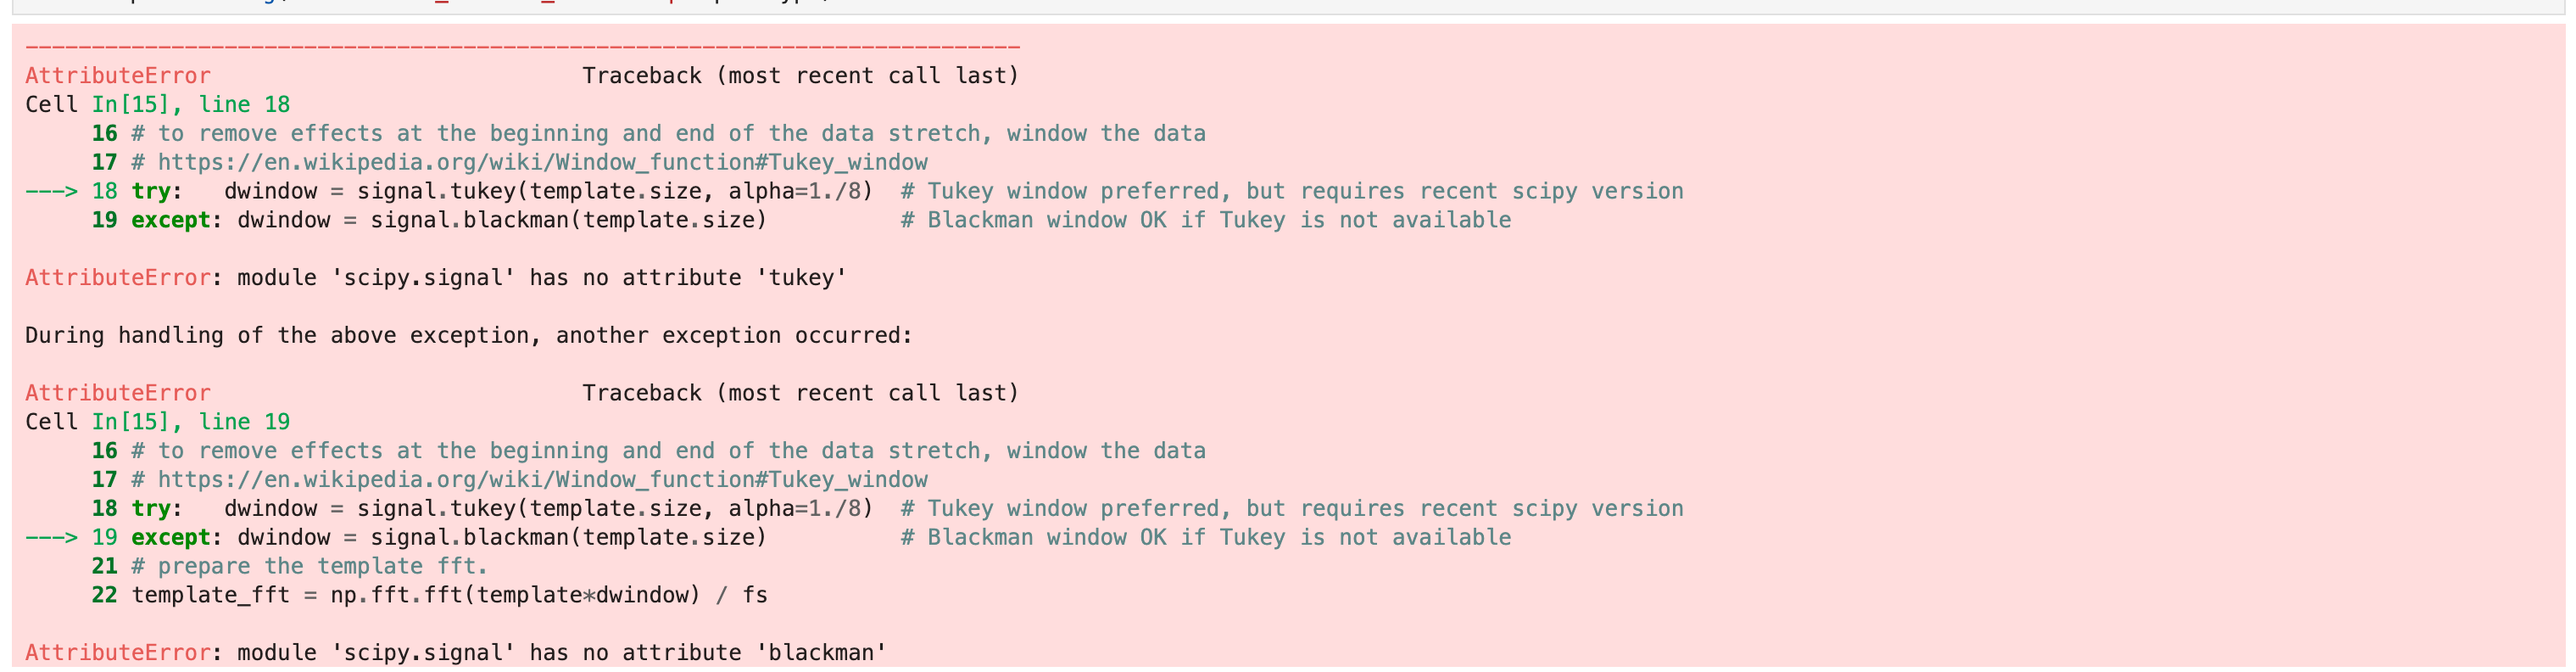

This is because the notebook code was written for an older version of the `scipy` package; the modules of the `scipy` package have since been shuffled around, and thus the filepaths to the modules with the `blackman` and `tukey` functions have changed. We ask that you do some digging in Google, in the `scipy` documentation, etc. to find where the `blackman` and `tukey` functions have been moved to, and to replace the `signal.blackman(...)` and `signal.tukey(...)` calls with ones that accurately reflect the module they have been moved to. Run the code to ensure your fix no longer throws errors.


**Tag:** at this stage, add a tag called `binder`.

### [5 points] GitHub repository

In this homework we are going to evaluate the overall workflow using git and GitHub. Be sure that you repository includes:
- Clear commit messages as you make progress on the homework. 
- Your repository needs to include all the tags described in the previous items. 
- The `README.md` should include a basic description of the project with the Binder badge on it so you can directly launch Binder from there.
- **Update 9/30**: please also include a file in your repo called `ai_documentation.txt` with prompts and output of any AI/LLM tool you used in the completion of this assignment. If you did not use any tools, please still include the file, but note this inside.
- Not include any other file or folder than those needed for the project. For archiving this you can include a `.gitignore` file with the files you want git to ignore.